[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/azad-academy/personalized-diffusion-tutorial/blob/main/personalized-generation_tutorial.ipynb)

# Personalized Diffusion For Customized Image Synthesis 

#### Author : J. Rafid Siddiqui (jrs@azaditech.com)

![Latent Diffusion Model Image](https://raw.githubusercontent.com/azad-academy/personalized-generation-tutorial/main/cover.png)

                                Block Diagram of a Personalized Generator.
 

### In order to access the model, you will have to login using huggingface account. If you don't have one, you can signup freely on the huggingface website. After signing in to your account, visit the following link and click on the Access Respository button after agreeing to the license agreement. 

[Stable Diffusion Model Repository](https://huggingface.co/CompVis/stable-diffusion-v1-4)


# Pre-requisites, Imports and Initializers

In [ ]:
!pip install diffusers==0.2.4
!pip install scipy ftfy
!pip install omegaconf einops pytorch-lightning==1.6.5 test-tube transformers kornia clip torchmetrics
!pip install "ipywidgets>=7,<8"
!pip install wget
!pip install huggingface_hub
!pip install setuptools
from IPython.display import clear_output
clear_output()
print("Done. Installed all packages")

Done. Installed all packages


In [ ]:
from google.colab import output
from pathlib import Path
from PIL import Image
import torch
from diffusers import StableDiffusionPipeline
import requests
import getpass
from io import BytesIO
#from image_to_image import StableDiffusionImg2ImgPipeline, preprocess
import os, wget
from huggingface_hub import notebook_login
from pytorch_lightning.loggers import TestTubeLogger

output.enable_custom_widget_manager()
cache_drive = False

## Texual Inversion

In [ ]:
%cd /content
import shutil
shutil.rmtree('textual_inversion', ignore_errors=True)
#Getting the code for textual inversion
!git clone https://github.com/nicolai256/Stable-textual-inversion_win.git textual_inversion
#%cd textual_inversion/

/content
Cloning into 'textual_inversion'...
remote: Enumerating objects: 625, done.
remote: Total 625 (delta 0), reused 0 (delta 0), pack-reused 625
Receiving objects: 100% (625/625), 4.35 MiB | 15.11 MiB/s, done.
Resolving deltas: 100% (357/357), done.


In [ ]:
#HuggingFace Login
notebook_login()


Login successful
Your token has been saved to /root/.huggingface/token


### Mounting the Google Drive (Optional)
Execute this, If you would want to keep the session active and not login or download model again and again.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

cache_dir = "/content/drive/MyDrive/Colab Notebooks/weights" #@param {type:"string"}
cache_drive = True

Mounted at /content/drive/


In [ ]:
from huggingface_hub import hf_hub_download
print("Downloading the model, Please Wait...")
model_path = hf_hub_download(repo_id="CompVis/stable-diffusion-v-1-4-original", filename="sd-v1-4.ckpt",cache_dir="/content/drive/MyDrive/Colab Notebooks/weights",local_files_only=True)
print("Downloaded Model: "+ model_path)


Downloaded Model: /content/textual_inversion/models/ldm/sd-v1-4/models--CompVis--stable-diffusion-v-1-4-original/snapshots/0834a76f88354683d3f7ef271cadd28f4757a8cc/sd-v1-4.ckpt


In [ ]:
!mkdir /content/textual_inversion/images
#Get sample Images
!wget https://github.com/azad-academy/personalized-generation-tutorial/raw/main/images.zip
!unzip -j images.zip /content/textual_inversion/images

--2022-10-03 07:39:40--  https://github.com/azad-academy/personalized-generation-tutorial/raw/main/images.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-10-03 07:39:41 ERROR 404: Not Found.

unzip:  cannot find or open images.zip, images.zip.zip or images.zip.ZIP.


### Fine-Tuning the SD On Sample Images 

In [ ]:

#Running Training step for embedding the sample images into the model
!python /content/textual_inversion/main.py --base "/content/textual_inversion/configs/stable-diffusion/v1-finetune_colabP100.yaml" \
               -t --no-test \
               --actual_resume  {model_path}\
               -n teapot_inversion \
               --gpus 0, \
               --data_root /content/textual_inversion/images \
               --init_word "teapot" \

Global seed set to 23
Running on GPUs 0,
Loading model from /content/textual_inversion/models/ldm/sd-v1-4/models--CompVis--stable-diffusion-v-1-4-original/snapshots/0834a76f88354683d3f7ef271cadd28f4757a8cc/sd-v1-4.ckpt
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.21.layer_norm2.weight', 'vision_model.encoder.layers.23.mlp.fc1.bias', 'vision_model.encoder.layers.1.self_attn.v_proj.bias', 'vision_model.encoder.layers.15.mlp.fc2.bias', 'vision_model.encoder.layers.13.self_attn.out_proj.bias', 'vision_model.encoder.layers.12.self_attn.k_proj.bias', 'vision_model.encoder.layers.7.self_attn.q_proj.weight', 'vision_model.encoder.layers.7.sel

In [ ]:
# Saving the embeddings to drive for later use (change the path as needed)
!cp /logs/

### Generating Customized Images using the Learned Embeddings:

In [ ]:
#Running script for the generation of image embeddings

!python /content/textual_inversion/scripts/stable_txt2img.py --ddim_eta 0.0 \
                          --n_samples 1 \
                          --n_iter 1 \
                          --scale 10.0 \
                          --ddim_steps 50 \
                          --embedding_path /content/logs/trained_model/checkpoints/embeddings.pt \
                          --ckpt_path {model_path}  \
                          --prompt "a photo of *"

## Customized Image Generation with DreamBooth


## 

### 

### 

In [ ]:
captions = ["" for i in range(3)]
#@title # Add a Caption for each image above in the following textboxes
captions[0] = "A pair of white female shoes lying on the floor" #@param {type:"string"}
captions[1] = "Multiple paintings are hanging on the wall" #@param {type:"string"}
captions[2] = "A lake with a snowy mountain in the background" #@param {type:"string"}  

### Loading an Image to Image Model

0it [00:00, ?it/s]

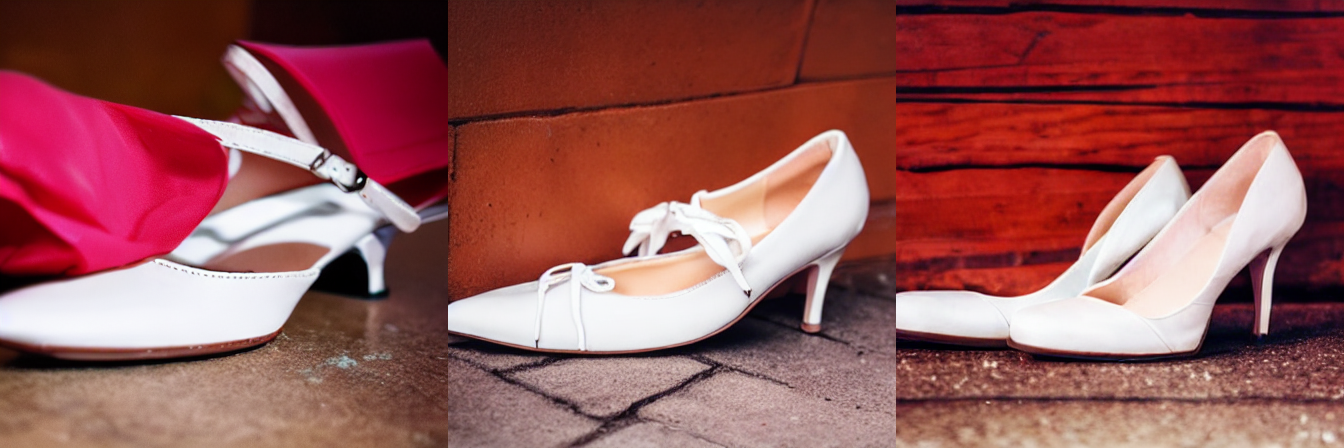

0it [00:00, ?it/s]

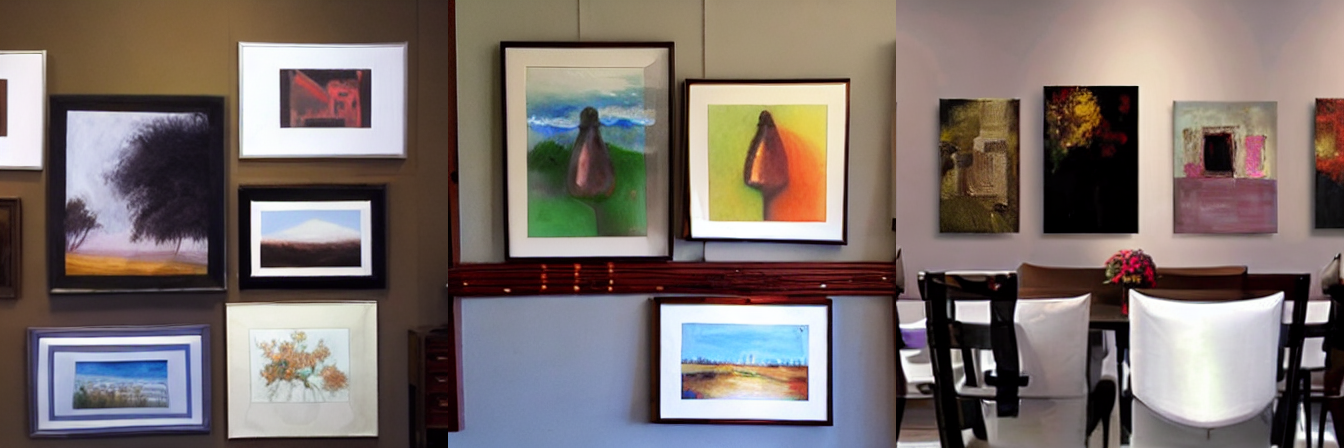

0it [00:00, ?it/s]

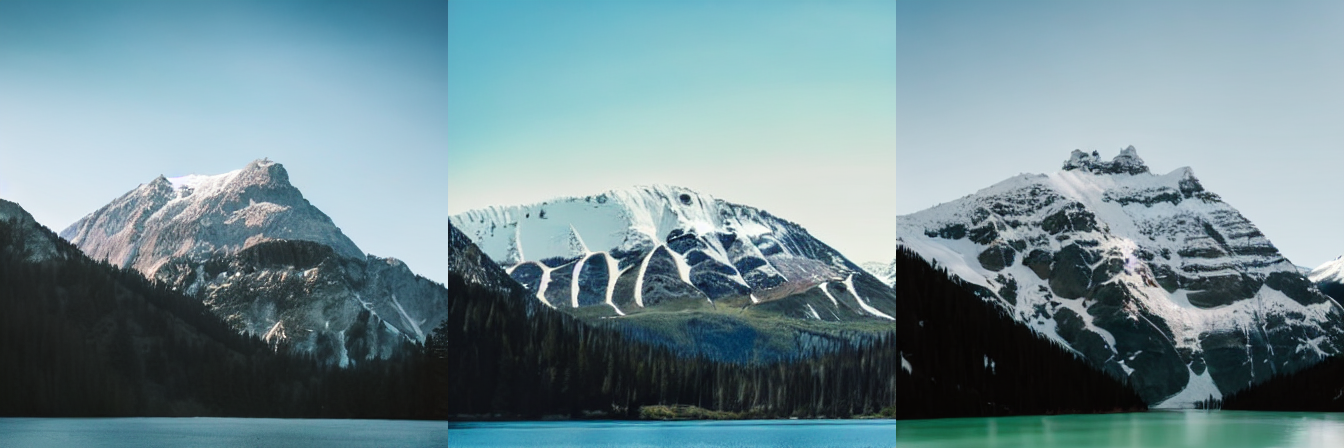

In [ ]:

H = 450 
W = 450 

#@markdown Seed:
seed = 3 #@param {type:"integer"}

#@markdown Steps to generate the image(lower number->faster but crappier image):
steps = 70 #@param {type:"slider", min:1, max:150, step:1}

#@markdown How strong your text prompt should influence the image(default 7.5)
guidance_scale = 7.5 #@param {type:"slider", min:6, max:15, step:0.1}


for i in range(3):
  #input_image = Image.open(path_to_input_image).convert("RGB")
  img = imgs[i]
  input_image = img.resize((W, H))
  input_image_array = preprocess(input_image)

  generator = torch.Generator("cuda").manual_seed(seed)
  with torch.autocast("cuda"):
      prompt = [captions[i]]*num_imgs
      images = pipe(prompt, init_image=input_image_array, num_inference_steps=steps, generator=generator, guidance_scale=guidance_scale)["sample"]
      del generator

  #@markdown ### Display Settings
  show_grid = True #@param {type:"boolean"}
  if show_grid:
      #new_grid = [input_image, images[0]]
      grid = image_grid(images,rows=1,cols=3)  #Show three images for each original image
      display(grid)
  else:
      display(images[0])

# References


[1] Robin Rombach, Andreas Blattmann, Dominik Lorenz, Patrick Esser, Björn Ommer, [Latent Diffusion Models](https://arxiv.org/abs/2112.10752), 2022

[2] Rinon Gal, Yuval Alaluf, Yuval Atzmon, Or Patashnik, Amit H. Bermano, Gal Chechik, Daniel Cohen-Or, [An Image is Worth One Word: Personalizing Text-to-Image Generation using Textual Inversion](https://arxiv.org/abs/2208.01618), 2022

[3] Nataniel Ruiz, Yuanzhen Li, Varun Jampani, Yael Pritch, Michael Rubinstein, Kfir Aberman, [DreamBooth: Fine Tuning Text-to-Image Diffusion Models for Subject-Driven Generation](https://arxiv.org/abs/2208.12242), 2022